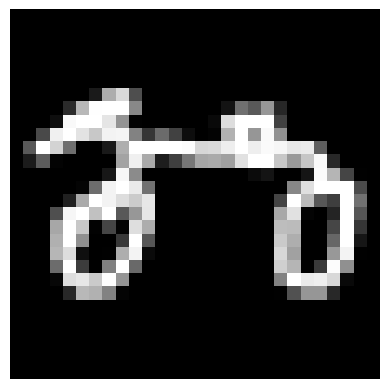

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

# Extract the first image
first_image = array_data[16].reshape(28, 28)  # Assuming each image is 28x28 pixels (adjust as per your data)

# Display the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [2]:
import numpy as np
import os

# List of file paths for the 10 classes

file_paths = [
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=10000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 28, 28, 1)  # Assuming the images are 28x28 pixels and grayscale


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths for the 10 classes
file_paths = [
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=50000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 1,28, 28)  # Assuming the images are 28x28 pixels and grayscale

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (400000, 1, 28, 28)
X_test shape: (100000, 1, 28, 28)
y_train shape: (400000,)
y_test shape: (100000,)


In [4]:
y_test
unique_elements = np.unique(y_test)
print(unique_elements)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Define the class labels
class_labels = [
    'The Eiffel Tower',
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_baseball',
    'full_numpy_bitmap_bathtub',
    'full_numpy_bitmap_bicycle',
    'full_numpy_bitmap_apple',
    'full_numpy_bitmap_bat',
    'full_numpy_bitmap_alarm clock',
    'full_numpy_bitmap_airplane',
    'full_numpy_bitmap_book'
]

# Create the dictionary
class_dict = {i: label for i, label in enumerate(class_labels)}

# Print the dictionary
print(class_dict)

{0: 'The Eiffel Tower', 1: 'full_numpy_bitmap_basketball', 2: 'full_numpy_bitmap_baseball', 3: 'full_numpy_bitmap_bathtub', 4: 'full_numpy_bitmap_bicycle', 5: 'full_numpy_bitmap_apple', 6: 'full_numpy_bitmap_bat', 7: 'full_numpy_bitmap_alarm clock', 8: 'full_numpy_bitmap_airplane', 9: 'full_numpy_bitmap_book'}


In [6]:
X_test.shape

(100000, 1, 28, 28)

In [7]:
X_test_reshaped = np.reshape(X_test, (100000, 1, 28, 28))
X_train_reshaped = np.reshape(X_train, (400000, 1, 28, 28))

# Print the shape after reshaping
print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)

X_train shape after reshaping: (400000, 1, 28, 28)
X_test shape after reshaping: (100000, 1, 28, 28)


In [8]:
X_train_reshaped[1].shape

(1, 28, 28)

In [48]:
X_test_reshaped = np.reshape(X_test[9], (1, 28, 28))

# Print the shape after reshaping
print("X_test[9] shape after reshaping:", X_test_reshaped.shape)

X_test[9] shape after reshaping: (1, 28, 28)


In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assume X_train, y_train, X_test, y_test are already defined as numpy arrays or tensors

# Convert data to tensors if they are numpy arrays
if isinstance(X_train_reshaped, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32) #dtype=torch.float32
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.int64)
if isinstance(X_test_reshaped, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)
if isinstance(y_test, np.ndarray):
    y_test = torch.tensor(y_test, dtype=torch.int64)

# Combine data and labels into TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)


In [101]:
for X, y in train_dataloader:
    print(X.shape)
    break

torch.Size([32, 28, 28, 1])


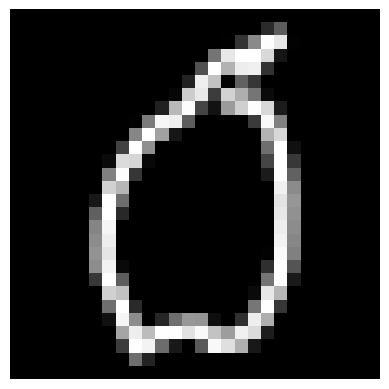

In [11]:
import matplotlib.pyplot as plt
import torch
image_to_plot = X_train[5]  # Assuming you want to plot the second image (index 1)

# Plot the image directly using PyTorch and matplotlib
plt.imshow(image_to_plot.squeeze(0), cmap='gray')  # Squeeze along the channel dimension
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()

In [12]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000287FF932A50>, <torch.utils.data.dataloader.DataLoader object at 0x0000028820864470>)
Length of train dataloader: 12500 batches of 32
Length of test dataloader: 3125 batches of 32


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
train_labels_batch

tensor([6, 2, 4, 9, 0, 9, 3, 4, 1, 7, 5, 1, 8, 2, 3, 8, 2, 2, 9, 1, 9, 3, 9, 0,
        0, 9, 2, 8, 3, 1, 4, 1])

In [15]:
class_dict[1]

'full_numpy_bitmap_basketball'

In [30]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

class DoodleClassModel04(nn.Module):
    def __init__(self, input_channels: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

torch.manual_seed(42)

# Check if GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model_2 = DoodleClassModel04(input_channels=1, output_shape=len(class_dict)) # For grayscale images
model_2.to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

# Data loading (assuming train_dataloader and test_dataloader are defined)
epochs = 30

# Training loop
for epoch in tqdm(range(epochs)):
    model_2.train()
    train_loss = 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        y_pred = model_2(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    
    # Evaluation
    model_2.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_2(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    scheduler.step(test_loss)  # Update the scheduler

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

print("Training Complete")


c:\test001\ttt\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
  3%|▎         | 1/30 [00:27<13:06, 27.13s/it]

Epoch 1/30 | Train Loss: 0.3991 | Test Loss: 0.2465 | Test Acc: 91.94%


  7%|▋         | 2/30 [00:53<12:31, 26.83s/it]

Epoch 2/30 | Train Loss: 0.3024 | Test Loss: 0.2112 | Test Acc: 93.17%


 10%|█         | 3/30 [01:20<11:58, 26.62s/it]

Epoch 3/30 | Train Loss: 0.2786 | Test Loss: 0.2038 | Test Acc: 93.40%


 13%|█▎        | 4/30 [01:46<11:28, 26.48s/it]

Epoch 4/30 | Train Loss: 0.2655 | Test Loss: 0.1975 | Test Acc: 93.69%


 17%|█▋        | 5/30 [02:19<11:59, 28.77s/it]

Epoch 5/30 | Train Loss: 0.2582 | Test Loss: 0.1932 | Test Acc: 93.83%


 20%|██        | 6/30 [02:53<12:17, 30.73s/it]

Epoch 6/30 | Train Loss: 0.2522 | Test Loss: 0.1904 | Test Acc: 93.87%


 23%|██▎       | 7/30 [03:32<12:47, 33.39s/it]

Epoch 7/30 | Train Loss: 0.2477 | Test Loss: 0.1853 | Test Acc: 94.01%


 27%|██▋       | 8/30 [04:15<13:21, 36.45s/it]

Epoch 8/30 | Train Loss: 0.2439 | Test Loss: 0.1882 | Test Acc: 93.94%


 30%|███       | 9/30 [04:49<12:30, 35.73s/it]

Epoch 9/30 | Train Loss: 0.2405 | Test Loss: 0.1847 | Test Acc: 94.04%


 33%|███▎      | 10/30 [05:26<12:00, 36.03s/it]

Epoch 10/30 | Train Loss: 0.2382 | Test Loss: 0.1836 | Test Acc: 94.05%


 37%|███▋      | 11/30 [05:58<11:00, 34.78s/it]

Epoch 11/30 | Train Loss: 0.2368 | Test Loss: 0.1829 | Test Acc: 94.14%


 40%|████      | 12/30 [06:37<10:52, 36.23s/it]

Epoch 12/30 | Train Loss: 0.2344 | Test Loss: 0.1799 | Test Acc: 94.24%


 43%|████▎     | 13/30 [07:04<09:25, 33.26s/it]

Epoch 13/30 | Train Loss: 0.2320 | Test Loss: 0.1813 | Test Acc: 94.15%


 47%|████▋     | 14/30 [07:30<08:19, 31.19s/it]

Epoch 14/30 | Train Loss: 0.2298 | Test Loss: 0.1788 | Test Acc: 94.28%


 50%|█████     | 15/30 [08:06<08:06, 32.42s/it]

Epoch 15/30 | Train Loss: 0.2295 | Test Loss: 0.1790 | Test Acc: 94.27%


 53%|█████▎    | 16/30 [08:48<08:17, 35.57s/it]

Epoch 16/30 | Train Loss: 0.2278 | Test Loss: 0.1784 | Test Acc: 94.26%


 57%|█████▋    | 17/30 [09:31<08:11, 37.80s/it]

Epoch 17/30 | Train Loss: 0.2281 | Test Loss: 0.1758 | Test Acc: 94.32%


 60%|██████    | 18/30 [10:14<07:51, 39.33s/it]

Epoch 18/30 | Train Loss: 0.2266 | Test Loss: 0.1747 | Test Acc: 94.34%


 63%|██████▎   | 19/30 [10:58<07:25, 40.53s/it]

Epoch 19/30 | Train Loss: 0.2235 | Test Loss: 0.1767 | Test Acc: 94.32%


 67%|██████▋   | 20/30 [11:40<06:51, 41.17s/it]

Epoch 20/30 | Train Loss: 0.2237 | Test Loss: 0.1749 | Test Acc: 94.35%


 70%|███████   | 21/30 [12:23<06:14, 41.64s/it]

Epoch 21/30 | Train Loss: 0.2232 | Test Loss: 0.1739 | Test Acc: 94.38%


 73%|███████▎  | 22/30 [13:06<05:36, 42.02s/it]

Epoch 22/30 | Train Loss: 0.2225 | Test Loss: 0.1763 | Test Acc: 94.33%


 77%|███████▋  | 23/30 [13:49<04:55, 42.20s/it]

Epoch 23/30 | Train Loss: 0.2222 | Test Loss: 0.1723 | Test Acc: 94.41%


 80%|████████  | 24/30 [14:25<04:03, 40.58s/it]

Epoch 24/30 | Train Loss: 0.2217 | Test Loss: 0.1723 | Test Acc: 94.43%


 83%|████████▎ | 25/30 [14:51<03:00, 36.15s/it]

Epoch 25/30 | Train Loss: 0.2208 | Test Loss: 0.1733 | Test Acc: 94.37%


 87%|████████▋ | 26/30 [15:23<02:19, 34.80s/it]

Epoch 26/30 | Train Loss: 0.2184 | Test Loss: 0.1736 | Test Acc: 94.39%


 90%|█████████ | 27/30 [16:06<01:51, 37.22s/it]

Epoch 27/30 | Train Loss: 0.2200 | Test Loss: 0.1711 | Test Acc: 94.44%


 93%|█████████▎| 28/30 [16:37<01:11, 35.57s/it]

Epoch 28/30 | Train Loss: 0.2176 | Test Loss: 0.1732 | Test Acc: 94.46%


 97%|█████████▋| 29/30 [17:03<00:32, 32.69s/it]

Epoch 29/30 | Train Loss: 0.2183 | Test Loss: 0.1729 | Test Acc: 94.41%


100%|██████████| 30/30 [17:29<00:00, 35.00s/it]

Epoch 30/30 | Train Loss: 0.2169 | Test Loss: 0.1708 | Test Acc: 94.45%
Training Complete


In [18]:
device

device(type='cuda')

In [31]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Move data to the device
            X, y = X.to(device), y.to(device)
            
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Move model to the device
model_2.to(device)

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results


{'model_name': 'DoodleClassModel04',
 'model_loss': 0.1708349734544754,
 'model_acc': 94.455}

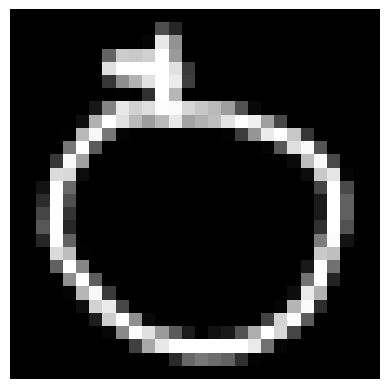

In [28]:
from PIL import Image
import torchvision.transforms as transforms

# Load the sample image
# sample_image_path = 'path_to_your_sample_image.jpg'  # Replace with your actual image path
# sample_image = Image.open(sample_image_path)

array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy')
# Extract the first image
input_tensor = array_data[6].reshape(28, 28,1)

# Display the first image
plt.imshow(input_tensor, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [26]:
import torch
import numpy as np

def preprocess_sample_image(image_array):
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    
    # Reshape the image to (1, 1, 28, 28) if it's a single image
    image_array = np.reshape(image_array, (1, 1, 28, 28))
    
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    
    # Check if CUDA (GPU) is available and move tensor to CUDA device
    if torch.cuda.is_available():
        device = torch.device("cuda")
        image_tensor = image_tensor.to(device)
    
    return image_tensor


In [29]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model_2(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_apple
Predicted class index: 5


In [32]:
torch.save(model_2.state_dict(), './models/cnn_model.pth')